### 1. Data Preprocessing.

In [1]:
# First import the required library for loading csv file.
import pandas as pd

In [2]:
# Now Load the CSV file.
data = pd.read_csv(r"C:\Users\DEV-Study\Downloads\Data Source (sales_transactions).csv")

In [3]:
# Inspect the Data:

# # Display the first few rows and summary of the DataFrame
data.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/24 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07/08/24 1:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02/08/24 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07/08/24 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09/08/24 9:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0


In [ ]:
# When i see data i observed few thing write step by step.

# Initial Understanding: The CSV data had some missing values, negative values, and inconsistencies. 
                         # I started by inspecting these issues.

# Data Handling: Addressed missing values and replaced or corrected invalid entries to ensure data quality or remove rows.

# Standardization: Converted data types for consistency and ensured all columns were in appropriate formats.

# Cleanup: Removed duplicates and handled inconsistencies to make the dataset ready for further analysis.

In [4]:
# Handle Missing Values:

# first Checking the missing values:
data.isnull().sum()

TransactionID       0
CustomerID          5
TransactionDate     1
ProductID           0
ProductCategory     0
Quantity            0
PricePerUnit       14
TotalAmount        14
TrustPointsUsed     0
PaymentMethod      10
DiscountApplied     5
dtype: int64

In [5]:
# Now i want drop missing values becuse if CustomerID is missing then data is not any use for my analysis.
data = data.dropna()

In [6]:
# Check Again
data.isnull().sum()

TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
ProductCategory    0
Quantity           0
PricePerUnit       0
TotalAmount        0
TrustPointsUsed    0
PaymentMethod      0
DiscountApplied    0
dtype: int64

In [7]:
# Now check summary of the data information.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 46
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    24 non-null     int64  
 1   CustomerID       24 non-null     float64
 2   TransactionDate  24 non-null     object 
 3   ProductID        24 non-null     int64  
 4   ProductCategory  24 non-null     object 
 5   Quantity         24 non-null     int64  
 6   PricePerUnit     24 non-null     float64
 7   TotalAmount      24 non-null     float64
 8   TrustPointsUsed  24 non-null     int64  
 9   PaymentMethod    24 non-null     object 
 10  DiscountApplied  24 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 2.2+ KB


In [8]:
# Convert data type becuase in few columns data type is not correct.
# data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d/%m/%Y %H:%M', errors='coerce')
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [10]:
# Now remove duplicate Values.
data.drop_duplicates(inplace=True)

In [11]:
# Now Check and Correct Outliers and Errors:
# I see few values are negative in data not convert netive number to zero.

# Filter out negative values where they don't make sense:
data = data[(data['Quantity'] >= 0) & (data['TotalAmount'] >= 0) & (data['PricePerUnit'] >= 0)]


In [13]:
print(data.head(10))

    TransactionID  CustomerID     TransactionDate  ProductID ProductCategory  \
0               1      1002.0 2024-08-08 22:00:00       2008         Grocery   
2               3      1004.0 2024-02-08 19:00:00       2002         Grocery   
7               8      1005.0 2024-04-08 22:00:00       2006            Toys   
9              10      1004.0 2024-01-08 14:00:00       2005         Fashion   
13             14      1002.0 2024-08-08 21:00:00       2006            Toys   
14             15      1001.0 2024-02-08 15:00:00       2003            Toys   
15             16      1001.0 2024-09-08 20:00:00       2003            Toys   
21             22      1001.0 2024-07-08 09:00:00       2003     Electronics   
22             23      1002.0 2024-10-08 00:00:00       2001     Electronics   
24             25      1003.0 2024-06-08 03:00:00       2002     Electronics   

    Quantity  PricePerUnit  TotalAmount  TrustPointsUsed PaymentMethod  \
0          1          10.0         10.0      

### 2. Data Aggregation and Grouping

In [14]:
# Fields to Aggregate:

#TotalAmount: Sum total amounts for different categories or time periods.
#Quantity: Sum quantities sold by product or category.
#DiscountApplied: Sum or average of discounts applied.
#TrustPointsUsed: Sum or average of trust points used.
#PricePerUnit: Average price per unit (if necessary).

In [15]:
# Total Sales by Product Category:
sales_by_category = data.groupby('ProductCategory')['TotalAmount'].sum()
print(sales_by_category)

ProductCategory
Electronics     700.0
Fashion        1050.0
Grocery         300.0
Home Decor       50.0
Toys            580.0
Name: TotalAmount, dtype: float64


In [16]:
# Total Quantity Sold by Product ID:
quantity_by_product = data.groupby('ProductID')['Quantity'].sum()
print(quantity_by_product)

ProductID
2001     1
2002     4
2003     6
2004     1
2005     2
2006     6
2007    11
2008     3
Name: Quantity, dtype: int64


In [17]:
# Average Discount Applied by Payment Method:
avg_discount_by_payment = data.groupby('PaymentMethod')['DiscountApplied'].mean()
print(avg_discount_by_payment)

PaymentMethod
Cash            28.000000
Credit Card     22.500000
Trust Points    17.777778
Name: DiscountApplied, dtype: float64


### 3. Data Validation

In [18]:
#Verify Aggregated Results:

#Compare aggregated results with raw data to ensure accuracy.
#Validate if calculated totals and summaries align with expectations.
#Validation Process:

#Cross-check Aggregations:

#For instance, sum of TotalAmount across all transactions should match the sum of TotalAmount in grouped results.
#Edge Cases:

total_sales_raw = data['TotalAmount'].sum()
print(f"Total Sales (Raw Data): {total_sales_raw}")

Total Sales (Raw Data): 2680.0


In [19]:
# Total sales by product category
sales_by_category = data.groupby('ProductCategory')['TotalAmount'].sum()
total_sales_category = sales_by_category.sum()
print(f"Total Sales (Aggregated by Category): {total_sales_category}")


Total Sales (Aggregated by Category): 2680.0


In [20]:
# Ensure both totals match:
assert total_sales_raw == total_sales_category, "Total sales mismatch!"

In [21]:
#Check Data Integrity:

#Ensure no negative values in fields where they shouldn't be.
# Check for negative values in fields that should be non-negative
#Negative values for Quantity or TotalAmount.

negative_quantities = data[data['Quantity'] < 0]
negative_amounts = data[data['TotalAmount'] < 0]
negative_prices = data[data['PricePerUnit'] < 0]

print("Negative Quantities:")
print(negative_quantities)
print("Negative Total Amounts:")
print(negative_amounts)
print("Negative Prices per Unit:")
print(negative_prices)

Negative Quantities:
Empty DataFrame
Columns: [TransactionID, CustomerID, TransactionDate, ProductID, ProductCategory, Quantity, PricePerUnit, TotalAmount, TrustPointsUsed, PaymentMethod, DiscountApplied]
Index: []
Negative Total Amounts:
Empty DataFrame
Columns: [TransactionID, CustomerID, TransactionDate, ProductID, ProductCategory, Quantity, PricePerUnit, TotalAmount, TrustPointsUsed, PaymentMethod, DiscountApplied]
Index: []
Negative Prices per Unit:
Empty DataFrame
Columns: [TransactionID, CustomerID, TransactionDate, ProductID, ProductCategory, Quantity, PricePerUnit, TotalAmount, TrustPointsUsed, PaymentMethod, DiscountApplied]
Index: []


In [22]:
#Missing values in critical columns.
#Unusual high or low values.
# Check for missing values in critical columns.

missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
ProductCategory    0
Quantity           0
PricePerUnit       0
TotalAmount        0
TrustPointsUsed    0
PaymentMethod      0
DiscountApplied    0
dtype: int64


### 4. Now Process to Data Visualizations Report.

In [23]:
# Now import Visualizations library for the creating Visualization Report.
import matplotlib.pyplot as plt

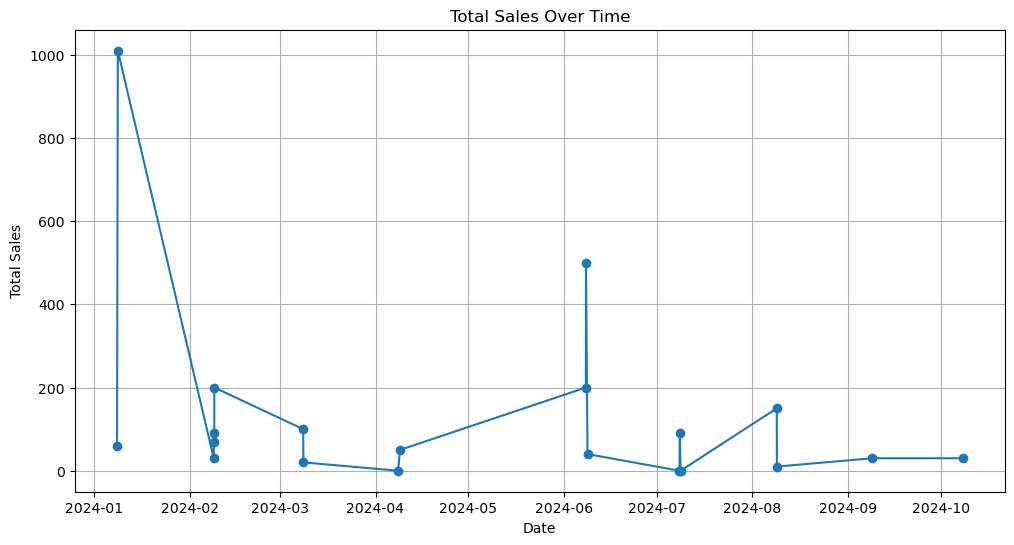

In [24]:
# Total Sales Over Time:
sales_over_time = data.groupby('TransactionDate')['TotalAmount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time, marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

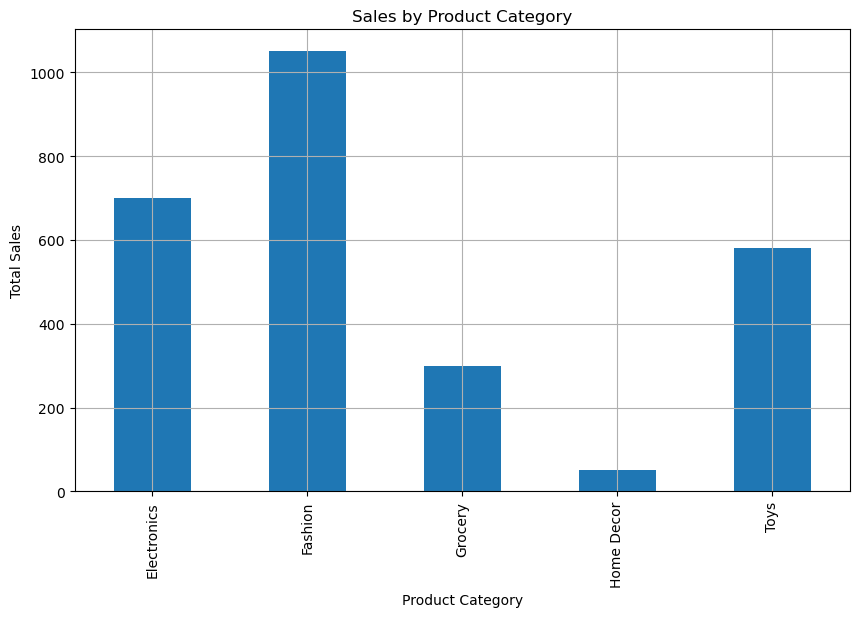

In [25]:
# Sales by Product Category:

category_sales = data.groupby('ProductCategory')['TotalAmount'].sum()
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

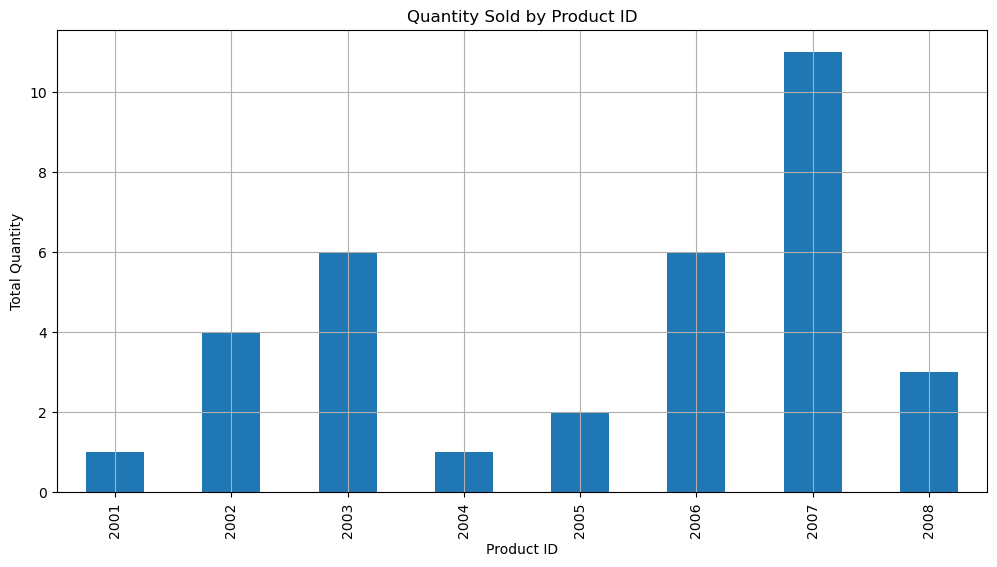

In [26]:
# Quantity Sold by Product ID:

quantity_by_product = data.groupby('ProductID')['Quantity'].sum()
plt.figure(figsize=(12, 6))
quantity_by_product.plot(kind='bar')
plt.title('Quantity Sold by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

In [ ]:
# Linearity Check:
# To check if data is linearly projected, you can use a scatter plot and fit a line to see if it approximates the data.

### Now Start SQL Integration.

In [27]:
# Create a MySQL Table:

# insert CSV into SQL and Perform Aggregations:
import mysql.connector

# Establish MySQL connection
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Manish@12345',
    database='Yuma'
)
cursor = conn.cursor()

# Load CSV data into MySQL
for _, row in data.iterrows():
    cursor.execute("""
        INSERT INTO transactions (
            TransactionID, CustomerID, TransactionDate, ProductID, ProductCategory, 
            Quantity, PricePerUnit, TotalAmount, TrustPointsUsed, PaymentMethod, 
            DiscountApplied
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['TransactionID'], row['CustomerID'], row['TransactionDate'], row['ProductID'],
        row['ProductCategory'], row['Quantity'], row['PricePerUnit'], row['TotalAmount'],
        row['TrustPointsUsed'], row['PaymentMethod'], row['DiscountApplied']
    ))

conn.commit()
cursor.close()
conn.close()


In [ ]:
 # Now Start Perform Aggregationsin Mysql WorkBench: These are the query which i perform on Mysql workbench.
    
# Total Sales by Product Category:
'''
SELECT ProductCategory, SUM(TotalAmount) as TotalSales
FROM transactions
GROUP BY ProductCategory;
'''

# Average Discount Applied by Payment Method:
'''
SELECT PaymentMethod, AVG(DiscountApplied) as AvgDiscount
FROM transactions
GROUP BY PaymentMethod;
'''
# Total Quantity Sold by Product ID:
'''
SELECT ProductID, SUM(Quantity) as TotalQuantity
FROM transactions
GROUP BY ProductID;
'''

### Summary:

In [ ]:
#Data Preprocessing: Cleaned data, handled missing values, corrected data types.

#Data Aggregation: Summed up values for Quantity, TotalAmount, TrustPointsUsed, DiscountApplied.

#Data Validation: Verified missing values, data types, and cross-validated results.

#Data Visualization: Plotted time series and bar graphs for insights.

#MySQL Integration: Created table, inserted data, and performed SQL aggregations.